<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h1>Nettoyage et analyse des données</h1>
    <p>
    - introduction
    - titres des sections
    - interprétation des visuels
    - justification des résultats
    - conclusion
    - etc
    </p>
    <p>
    contenant le procédé de développement de
    votre outil, du nettoyage à la modélisation des données, en
    passant par l’analyse exploratoire.</p>
</div>

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h1>Intro</h1>
    <p>
    1) Télecharger les données :<br>
    https://drive.google.com/file/d/1itXdRo4WJuhqCjtVX4WGvT327WWp4LB7/view?usp=sharing
    </p>
    <p>
    2) Enregistrer les données dans un dossier `raw_data` à la racine du projet</p>
</div>

In [1]:
import os
import pandas as pd
import chardet
import numpy as np
import unicodedata
import re

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

from eda_utils import *
from classification import eval_classification
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
DATA = "raw_data/bcw.csv"
TARGET = 'diagnosis'
# TARGET = "columns=['diagnosis']"

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <p>Detection du format d'encodage du fichier source</p>
</div>

In [3]:
with open(DATA, 'rb') as file :
    encodage = chardet.detect(file.read(10000))

print(encodage)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <p>Import du fichier source avec le bon encodage</p>
</div>

In [4]:
pd.options.display.max_columns = None
df = pd.read_csv(DATA, encoding='ascii')

In [5]:
df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NaN


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <p>La colonne 'id' ne contient que des valeurs unique, elle peut servir de colonne index</p>
</div>

In [6]:
print(f"Doublons dans la colonne 'id': {df['id'].duplicated().sum()}")
# print(f"Doublons dans l'index: {df.index.duplicated().sum()}")

Doublons dans la colonne 'id': 0


In [7]:
df = pd.read_csv(DATA, index_col=['id'])

df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Etats des données avant traitement</h3>
    <p>Pas de doublon<br>
    une seule colonnne entièrement vide : 'Unnamed: 32'<br>
    Les autre colonne n'ont pas de NA</p>
</div>

In [8]:
if count_duplicates(df) == 0:
    print("Aucun doublon trouvé dans le DataFrame.")
else :
    print(f"Nombre de doublons trouvés : {count_duplicates(df)}\nAppelez la fonction duplicate_rows()")

Aucun doublon trouvé dans le DataFrame.


In [9]:
empty_columns(df)

['Unnamed: 32']

In [10]:
# Supprime ['Unnamed: 32'] (les colonnes dont TOUTES les valeurs sont manquantes)
df = df.dropna(axis=1, how='all')

In [11]:
# Aucune colonnes contenant des valeurs manquantes explicites : NaN, None, '', 'na', 'null'
missing_like_columns(df)

[]

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Statistiques descriptives</h3>
    <p>Pour chaque variables, il y a de l'information sur de nombreuses décimales<br>
    le dataset ne fait que 569 observations<br>
    Il n'est pas pertinent de modifier le `float64` en `float 32` ou `float16`</p>
</div>

In [12]:
df.info()

<class 'pandas.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    str    
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  569 non-nu

In [13]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Pas de variables à valeurs unique, une seule modalité</h3>
</div>

In [14]:
# Détection des variables qui n'ont qu'une seule modalité
# NaN étant considéré comme une modalité .....  (dropna=False)
unique_value_cols = df.columns[df.nunique(dropna=False)==1].tolist()
unique_value_cols

[]

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Variables numériques</h3>
</div>

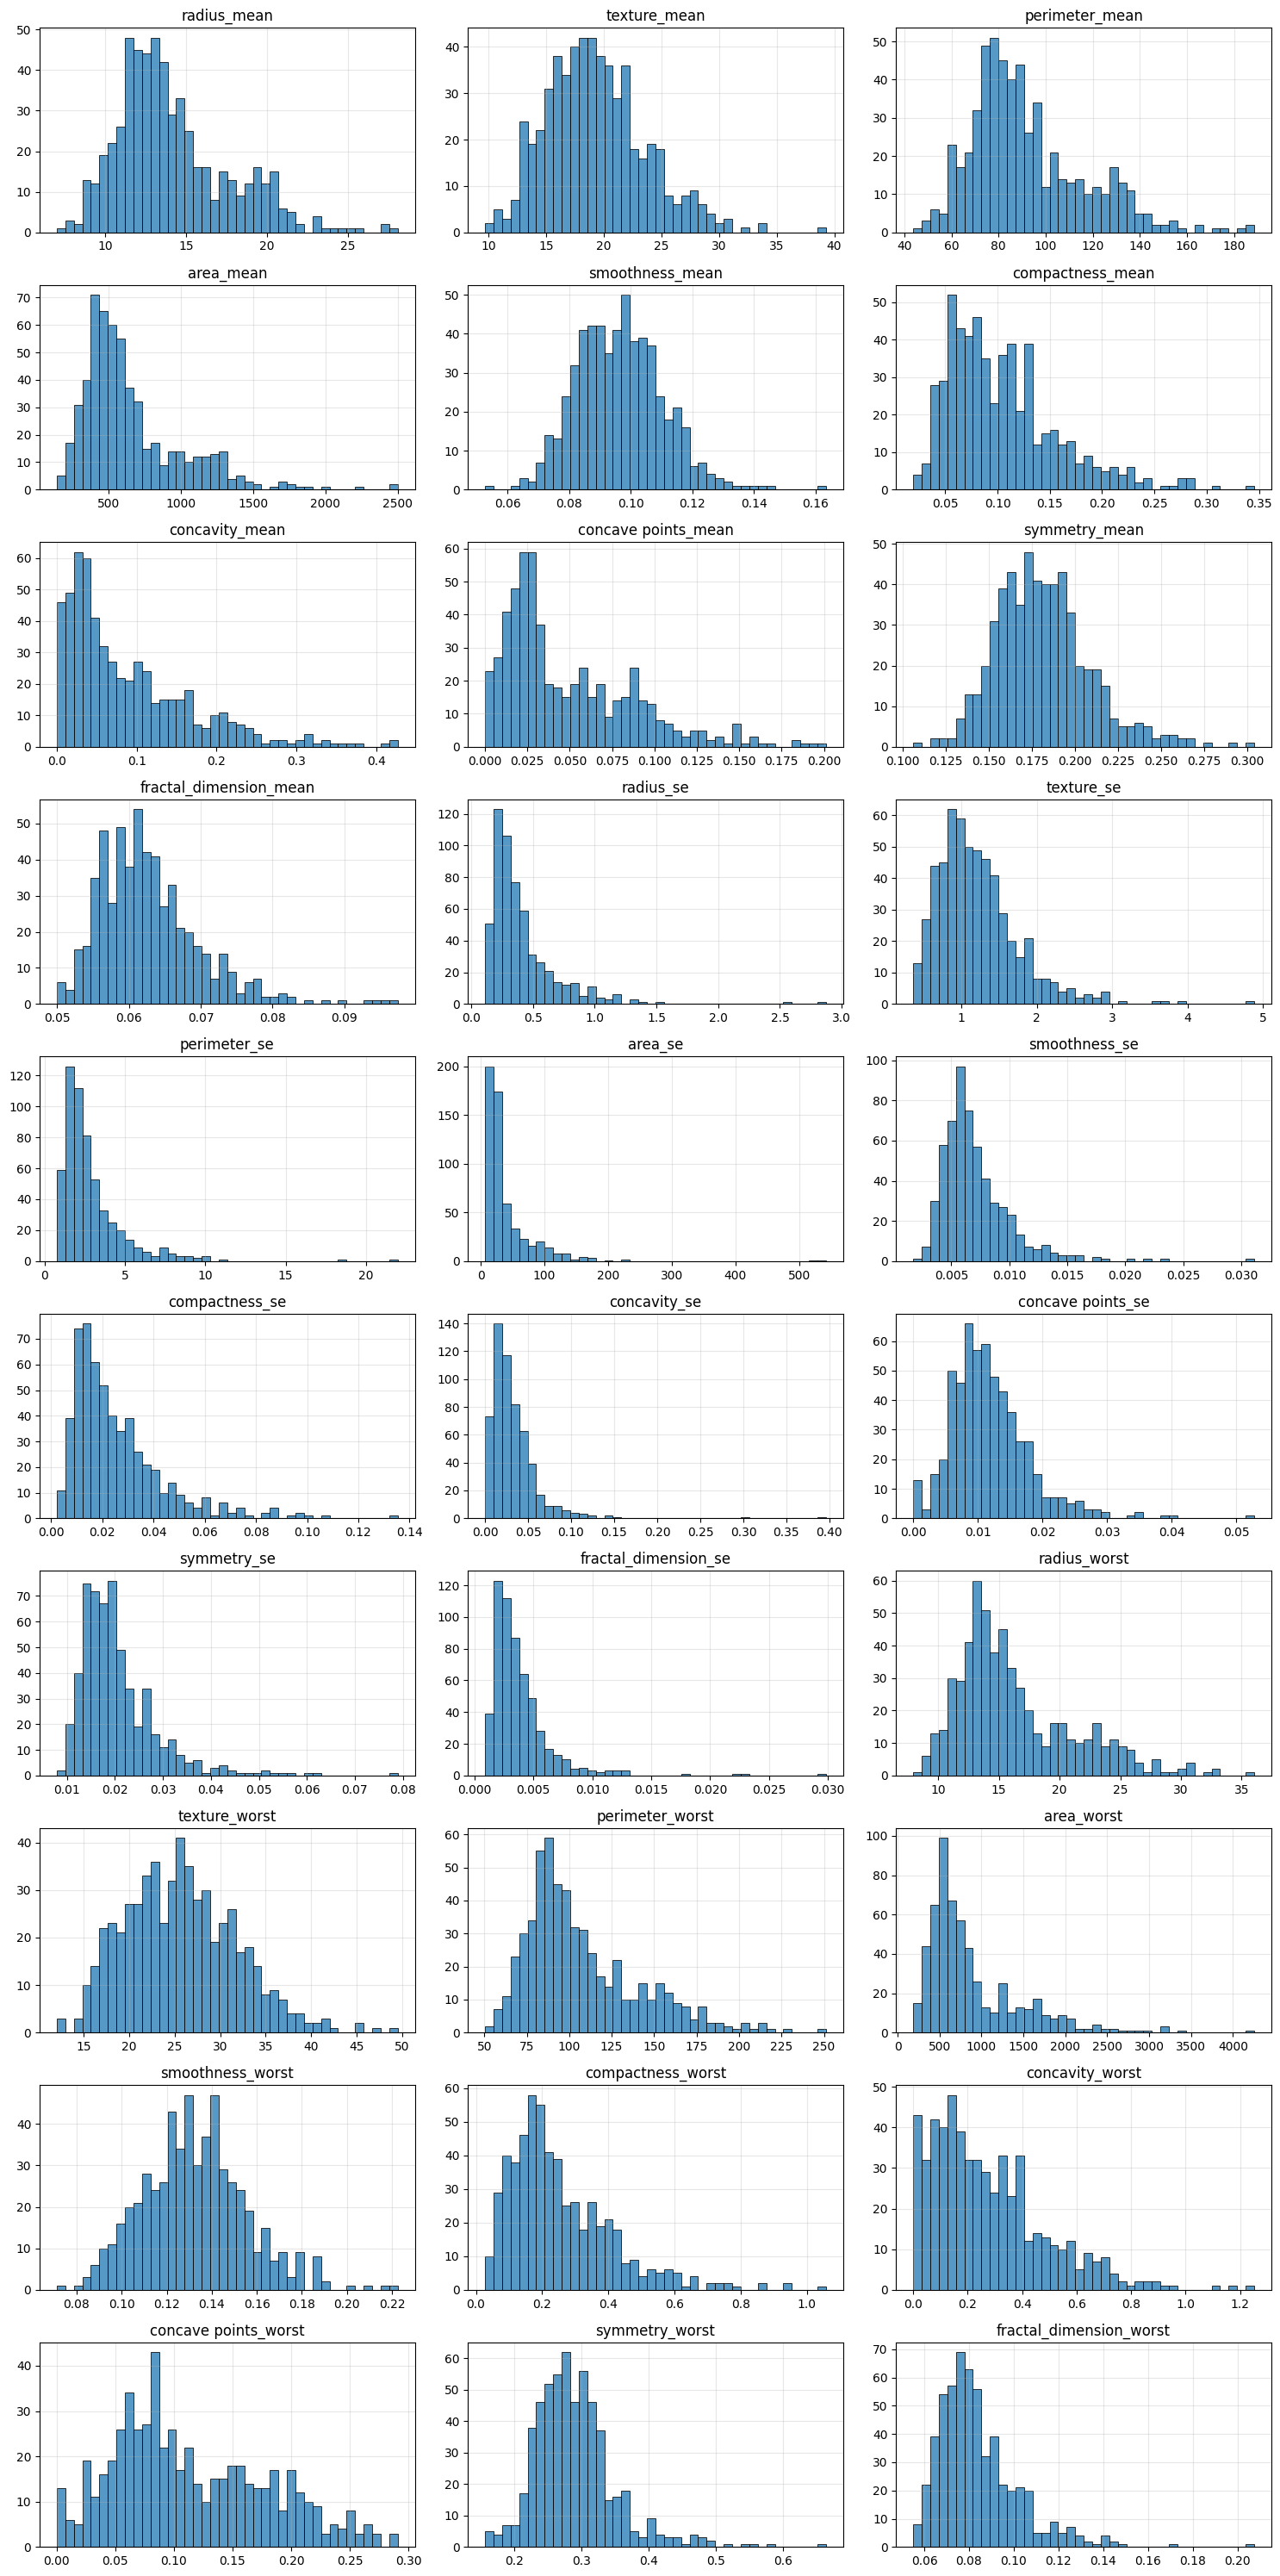

: 

: 

: 

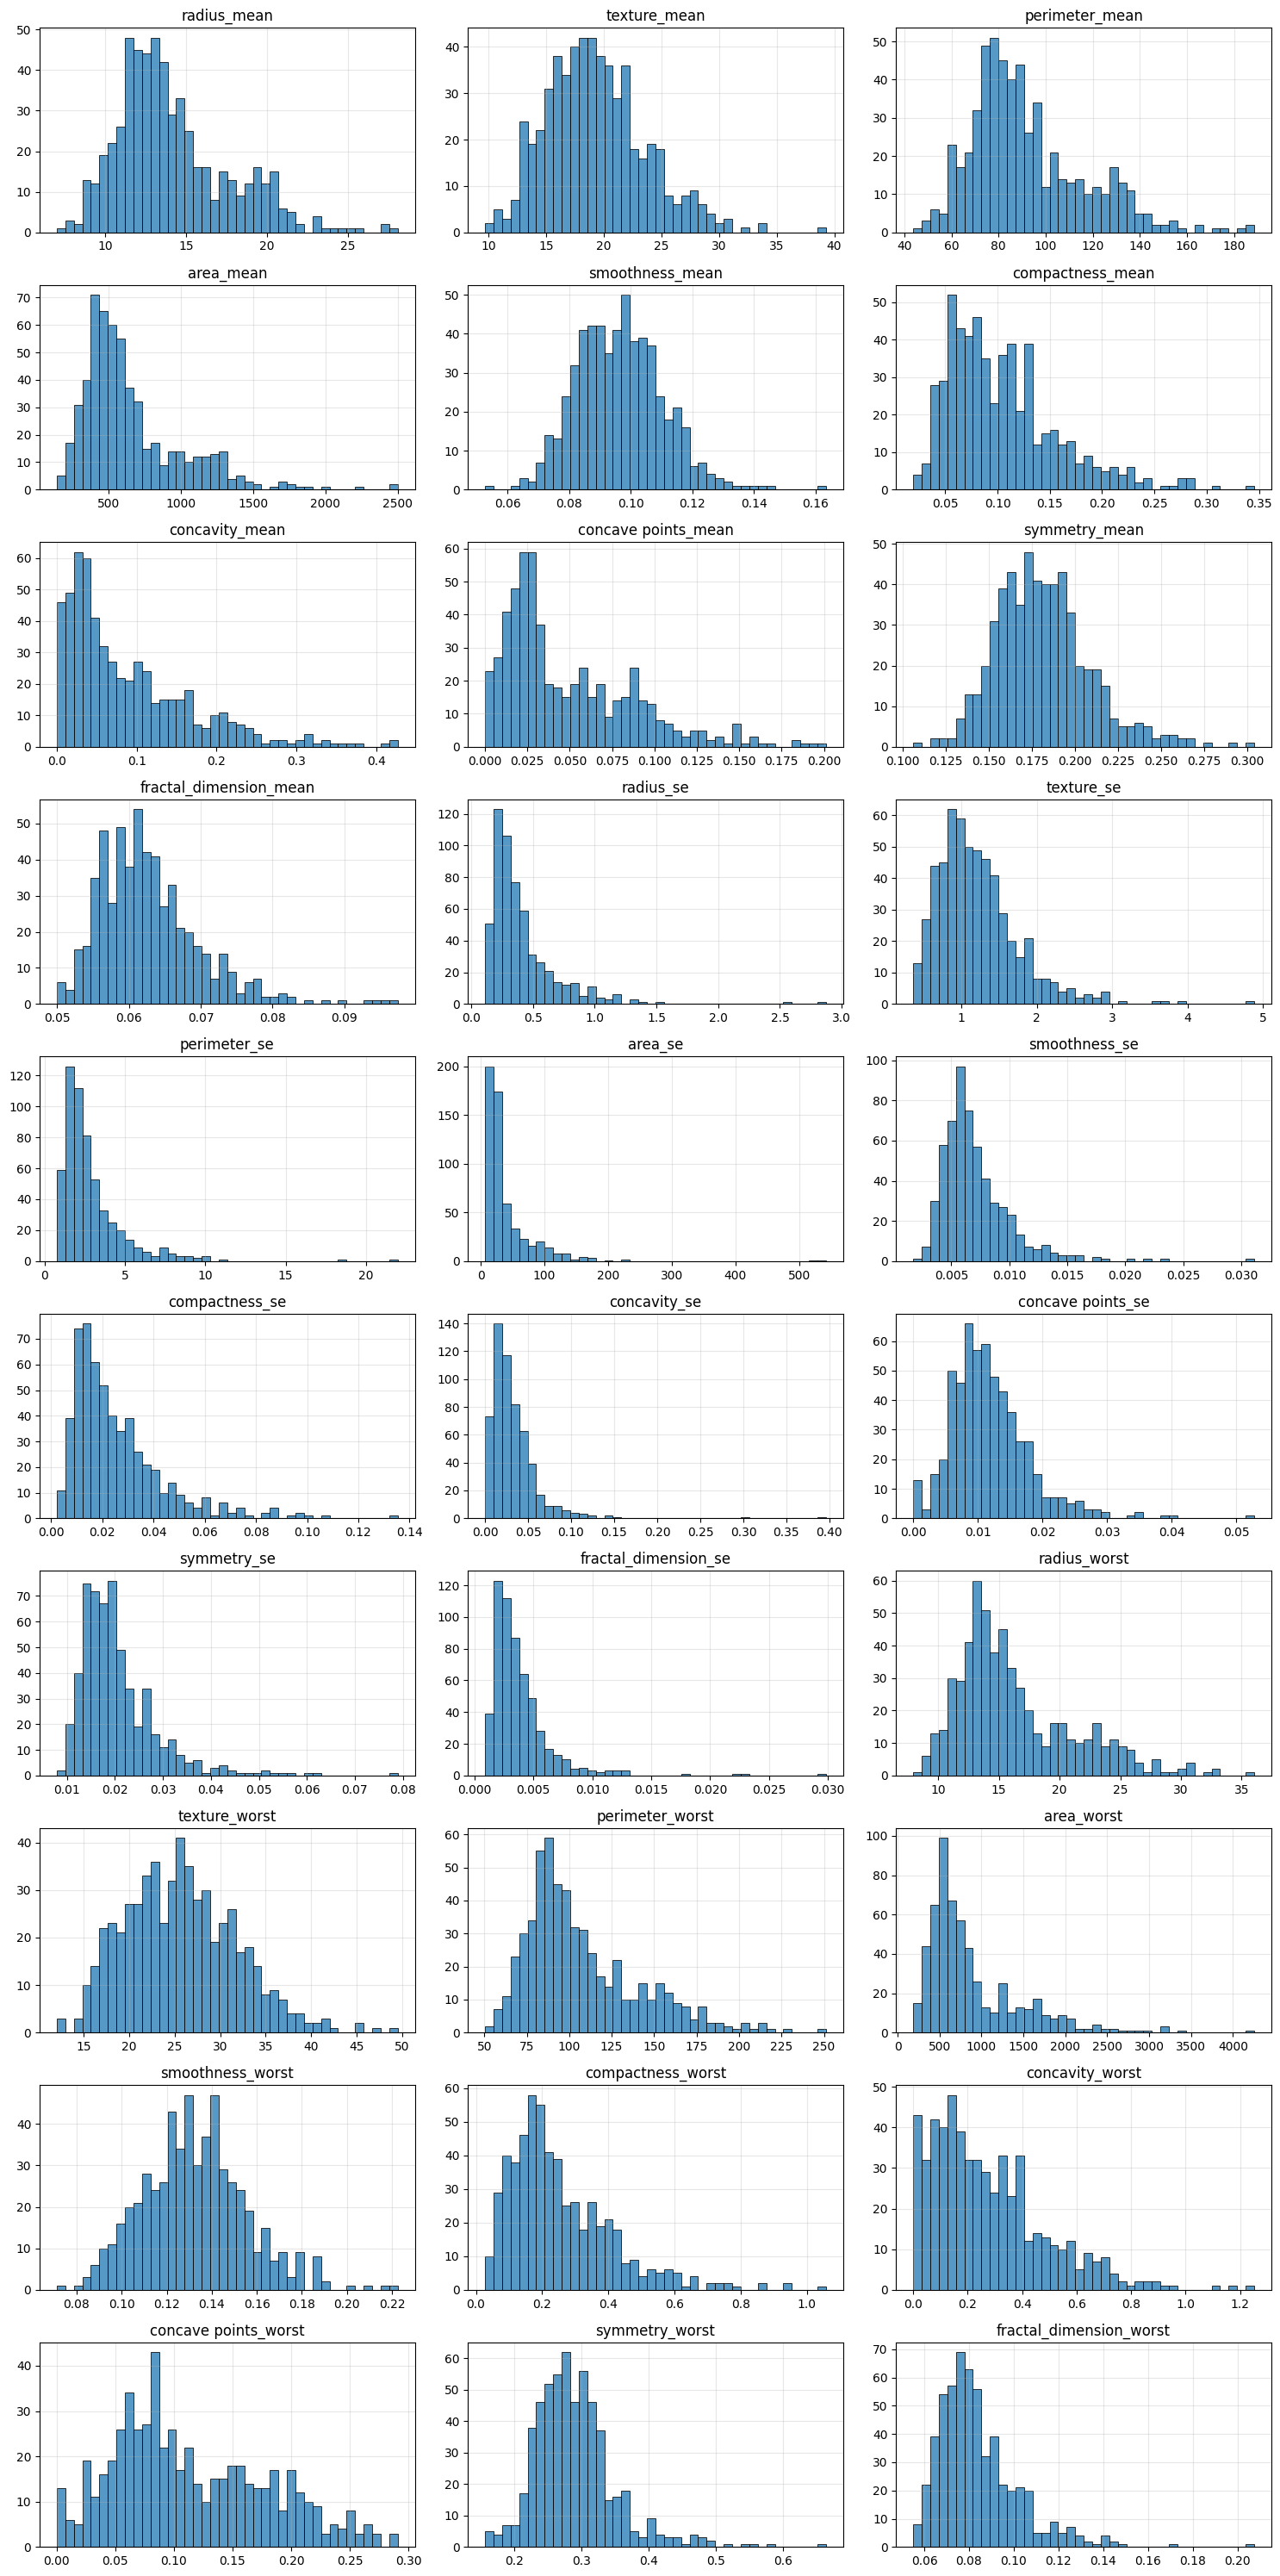

: 

: 

: 

: 

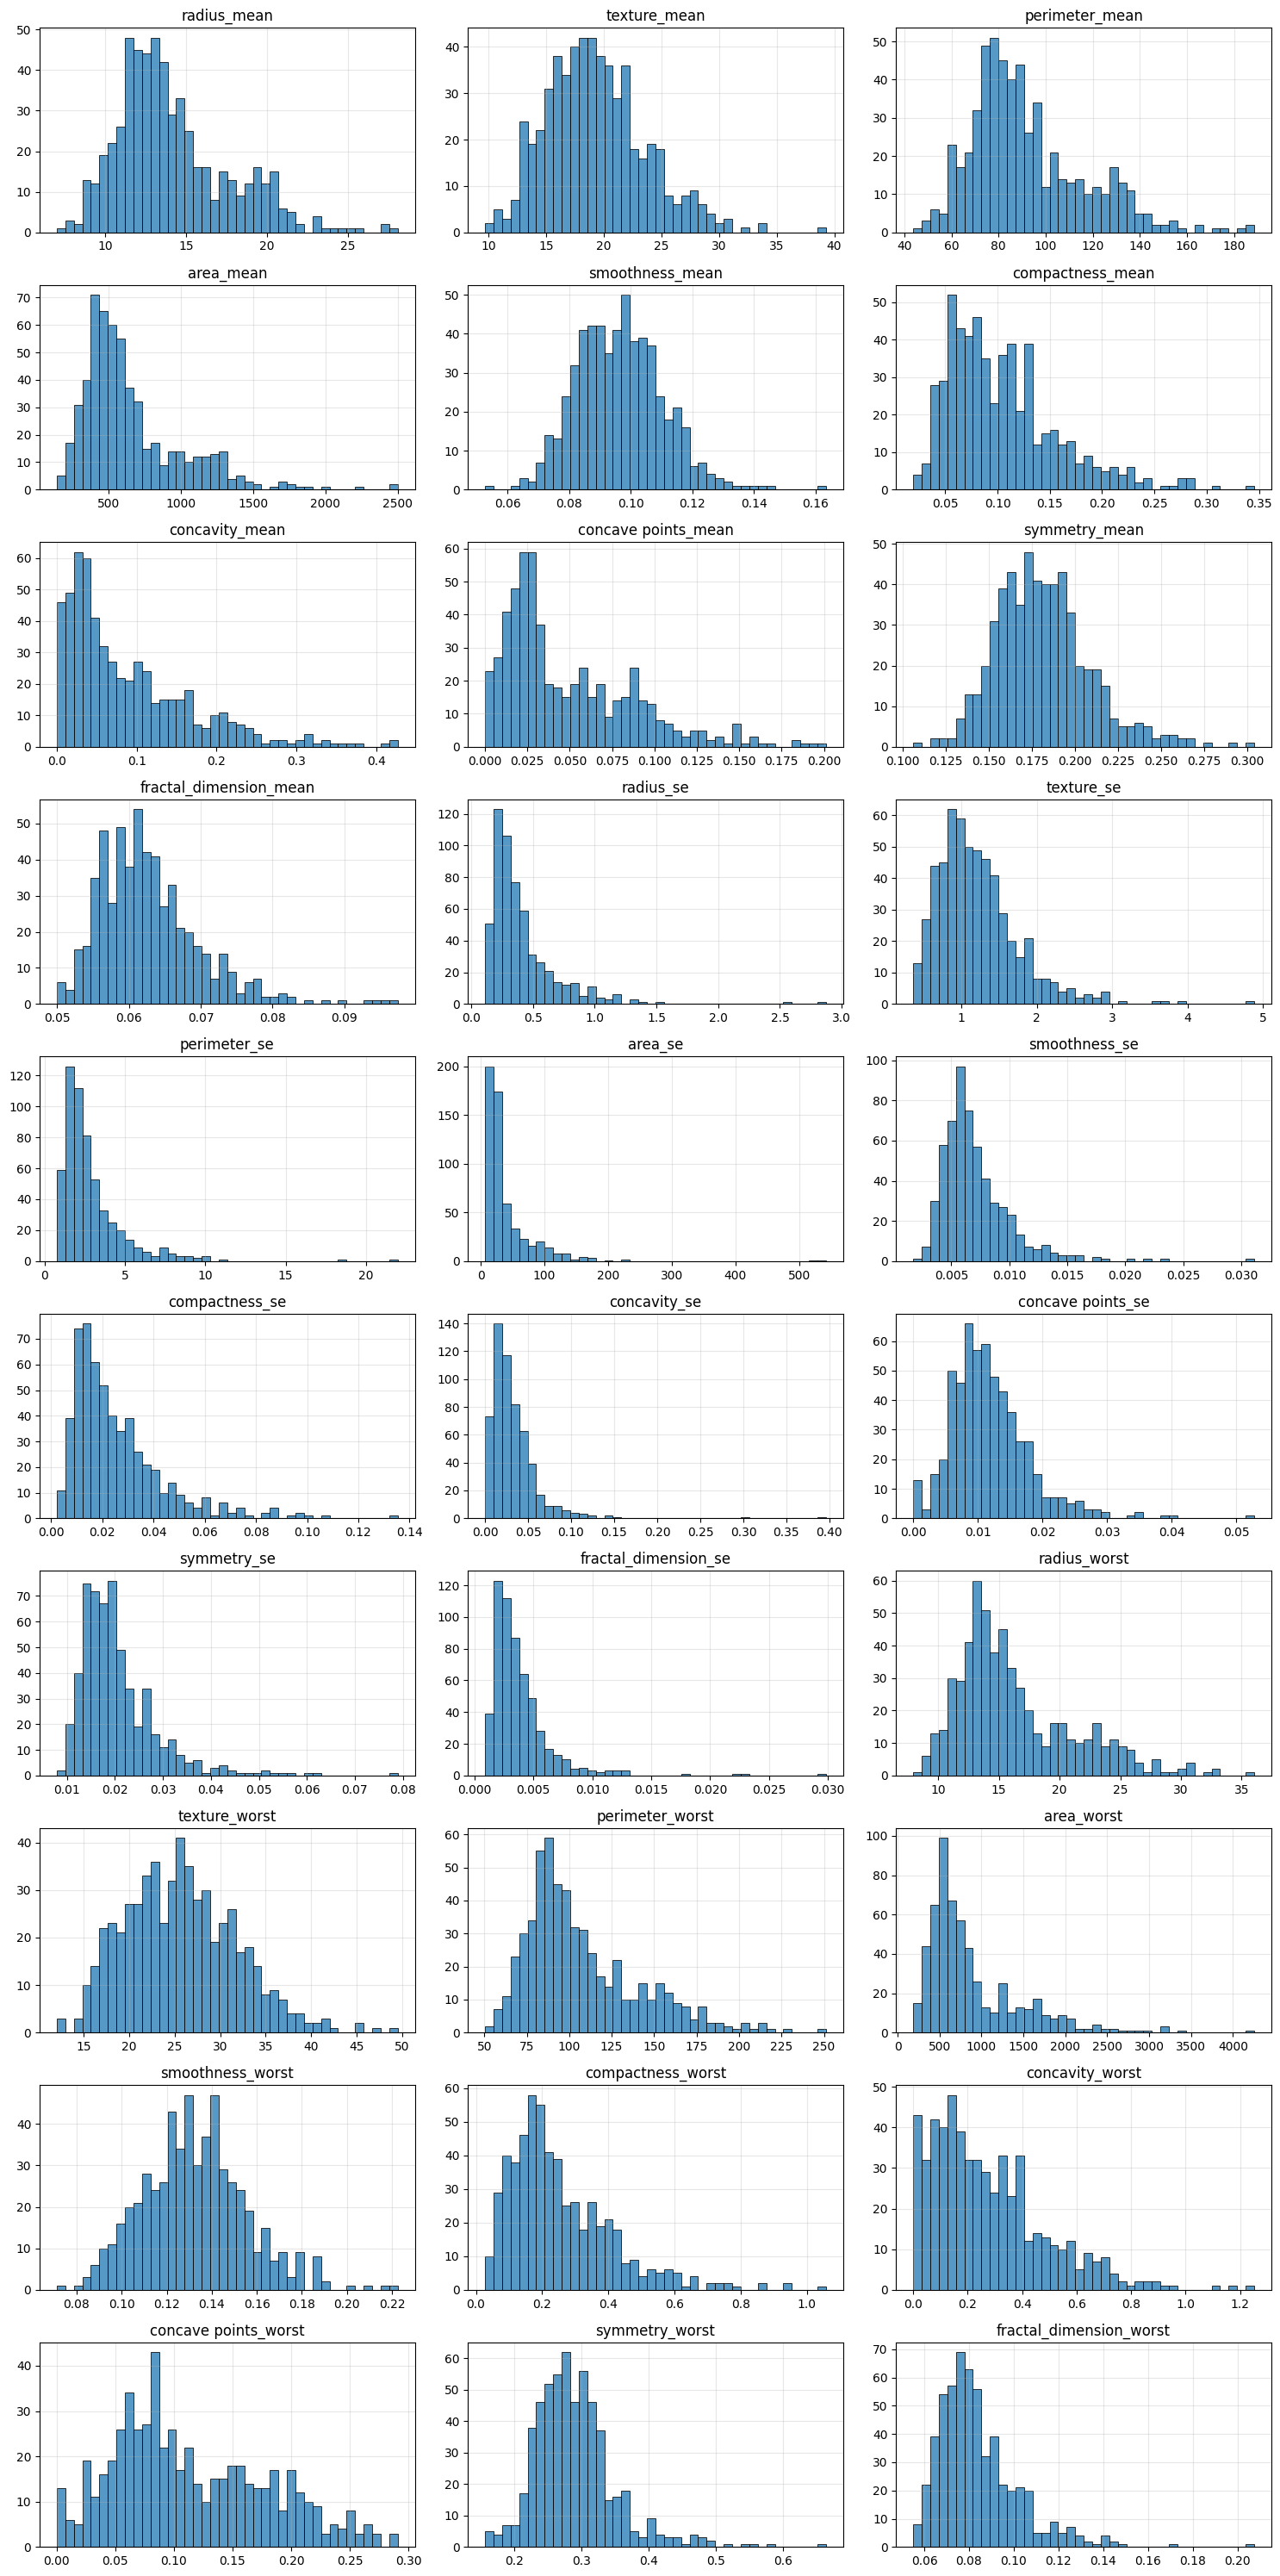

: 

: 

: 

: 

: 

: 

In [ ]:
# plot_numeric_histograms(df, bins=40, n_cols=3)

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Variable qualitative, c'est aussi la cible</h3>
    <p>Le jeux est déséquilibré, il faut penser à stratifier<br>
    ...</p>
</div>

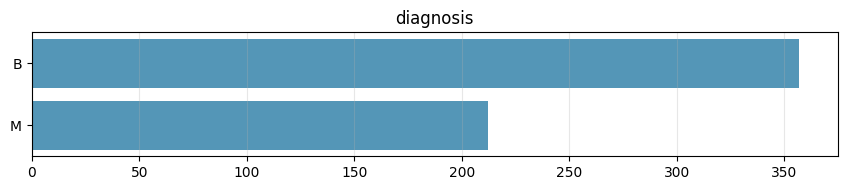

In [15]:
plot_qualitative(df, n_cols=3, figsize=(25, 2))

In [16]:
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [17]:
le = LabelEncoder()
df[TARGET] = le.fit_transform(df[TARGET])

# Vérifie qui est 0 et qui est 1 :
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'B': np.int64(0), 'M': np.int64(1)}


In [18]:
df[TARGET].unique()

array([1, 0])

<div style="background-color: #439cc8; color: white; font-size: 16px; font-style: italic; padding: 10px 15px; margin-bottom: 15px; border-radius: 8px;">
  <h3>1) Train/Test Split</h3>
  <p>Le split est réalisé après le nettoyage structurel pour éviter toute fuite d'information.<br>
  Le split est stratifié, <strong>y_train a le même déséquilibre que le dataset </strong><br>
  Les transformations apprises seront toujours basées sur le jeu d'entraînement.</p>
</div>

In [19]:
# Split et sauvegarde des jeux d'entraînement et de test

y = df[TARGET]
X = df.drop(columns=[TARGET])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"=== Train set ===\nX_train: {X_train.shape}\ny_train: {y_train.shape}\n\n==== Test set ====\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

=== Train set ===
X_train: (455, 30)
y_train: (455,)

==== Test set ====
X_test: (114, 30)
y_test: (114,)


In [21]:
plot_qualitative(y_train.to_frame(), n_cols=3, figsize=(25, 2))
plot_qualitative(y_train, n_cols=1, figsize=(8, 4))




In [23]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='str')

In [24]:
y_train.name

'diagnosis'

<div style="background-color: #439cc8; color: white; font-size: 16px; font-style: italic; padding: 10px 15px; margin-bottom: 15px; border-radius: 8px;">
  <h3>Analyse</h3>
  <p>...<br>
  ...<br>
  ...</p>
</div>

In [25]:
# Chercher les features corrélées entre elles à plus de 90%
collinear_pairs = feature_collinearity(X_train, threshold=0.9)

print("Paires de variables fortement colinéaires :")
for f1, f2, val in collinear_pairs:
    print(f"{f1} <-> {f2} : {val:.4f}")

Paires de variables fortement colinéaires :
perimeter_mean <-> radius_mean : 0.9978
perimeter_worst <-> radius_worst : 0.9937
area_mean <-> radius_mean : 0.9867
area_mean <-> perimeter_mean : 0.9860
area_worst <-> radius_worst : 0.9831
area_worst <-> perimeter_worst : 0.9767
perimeter_se <-> radius_se : 0.9747
perimeter_worst <-> perimeter_mean : 0.9700
radius_worst <-> perimeter_mean : 0.9693
radius_worst <-> radius_mean : 0.9693
perimeter_worst <-> radius_mean : 0.9644
radius_worst <-> area_mean : 0.9607
area_worst <-> area_mean : 0.9582
perimeter_worst <-> area_mean : 0.9567
area_se <-> radius_se : 0.9516
area_worst <-> perimeter_mean : 0.9411
area_worst <-> radius_mean : 0.9405
area_se <-> perimeter_se : 0.9392
concave points_mean <-> concavity_mean : 0.9206
concave points_worst <-> concave points_mean : 0.9122
texture_worst <-> texture_mean : 0.9117


In [26]:
# Top 10 des variables les plus liées au diagnostic
top_corr = target_correlations(X_train, y_train, n_top=10)

print(f"Top des variables corrélées à {TARGET} :")
print(top_corr)

# Pour votre graphique de corrélation
top_cols = top_corr.index.tolist()
# plot_scatter_vs_target(df, top_cols, TARGET) # Si vous avez cette fonction de visualisation

Top des variables corrélées à diagnosis :
concave points_worst    0.786306
perimeter_worst         0.782881
radius_worst            0.777602
concave points_mean     0.775737
perimeter_mean          0.740027
area_worst              0.731761
radius_mean             0.728160
area_mean               0.703893
concavity_mean          0.683688
concavity_worst         0.643116
Name: __target__, dtype: float64


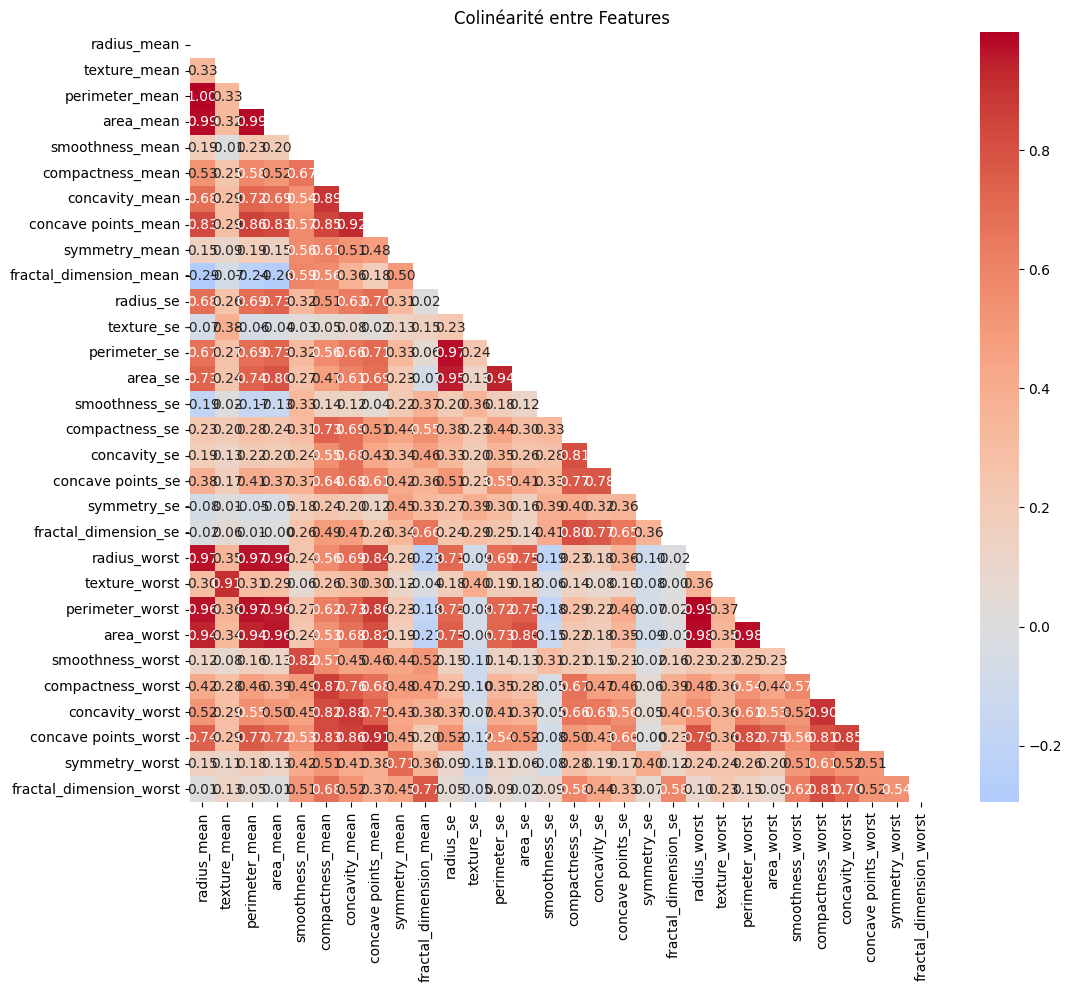

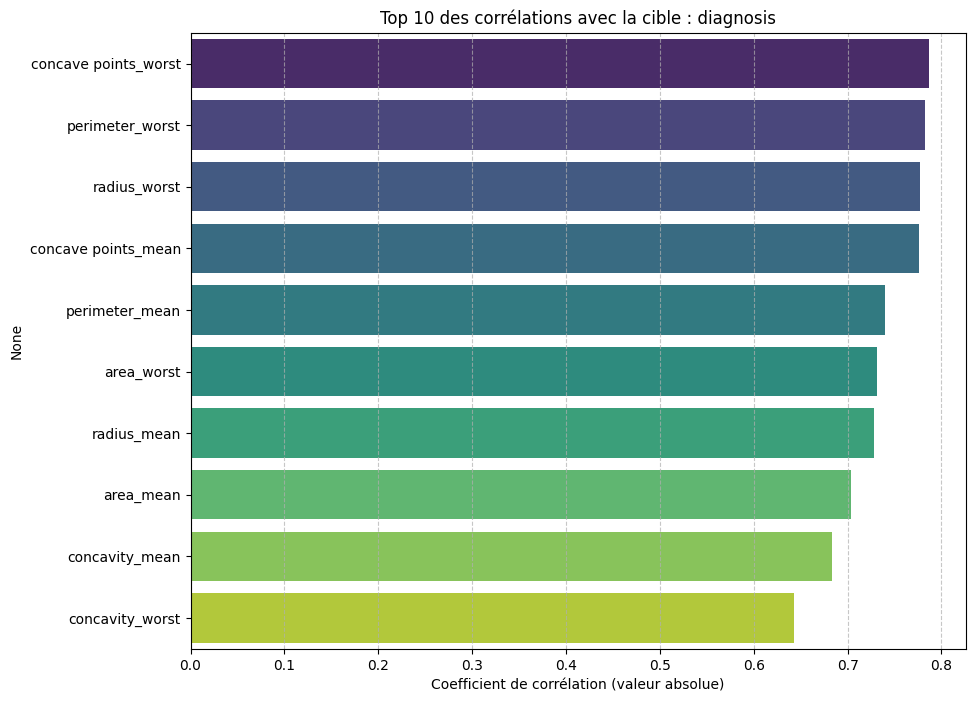

In [22]:
plot_feature_collinearity(X_train, figsize=(12, 10))
plot_target_correlations(X_train, y_train, n_top=10)

<div style="background-color: #439cc8; color: white; font-size: 16px; font-style: italic; padding: 10px 15px; margin-bottom: 15px; border-radius: 8px;">
  <h3>Modèle de base : DummyCLassifier</h3>
  <p>...<br>
  ...</p>
</div>

In [23]:
dc = DummyClassifier()

param_grid_dc = {'strategy': ['most_frequent', 'prior','stratified', 'uniform']}

results_dc = eval_classification(dc, param_grid_dc, X_train, y_train, X_test, y_test)

TypeError: object of type 'numpy.int64' has no len()